In [1]:
N = (6 + 4) % 5 + 1
print(f"Номер варіанту: {N}")

Номер варіанту: 1


In [2]:
# Task 1+

import pandas as pd

data = pd.read_csv("NationalNames.csv")

print(data.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [3]:
# Task 2+

print(data.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [4]:
# Task 3+

print(data.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [5]:
# Task 5+

unique_names = data['Name'].nunique()
print(f"Кількість унікальних імен: {unique_names}")

Кількість унікальних імен: 93889


In [6]:
# Task 10+

unique_names_per_year = data.groupby('Year')['Name'].nunique()
print(unique_names_per_year.head(5))

Year
1880    1889
1881    1830
1882    2012
1883    1962
1884    2158
Name: Name, dtype: int64


In [7]:
# task 11+

year_max_unique = unique_names_per_year.idxmax()
max_unique_count = unique_names_per_year.max()
print(f"Рік з найбільшою кількістю унікальних імен: {year_max_unique}")


Рік з найбільшою кількістю унікальних імен: 2008


In [8]:
# task 12+

most_unique_year = data[data['Year'] == year_max_unique]
most_popular_name = most_unique_year.loc[most_unique_year['Count'].idxmax()]
print(f"Найпопулярніше ім'я {most_popular_name['Name']}")


Найпопулярніше ім'я Jacob


In [9]:
# Task 13+

jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
most_popular_jacob_year = jacob_female.loc[jacob_female['Count'].idxmax()]
print(most_popular_jacob_year['Year'])

2004


In [10]:
# Task 14+

gn_names = data[data.duplicated(subset='Name', keep=False)]
gn_count = gn_names.groupby('Year')['Name'].nunique()
year_max_gn = gn_count.idxmax()
max_gn_count = gn_count.max()

print(f"Рік: {year_max_gn}, Нейтлрально гендерних імен: {max_gn_count}")

Рік: 2008, Нейтлрально гендерних імен: 31734


In [11]:
# Task 15+

total_births_per_year = data.groupby('Year')['Count'].sum()
print(total_births_per_year.head())

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64


In [12]:
# Task 16+

year_max_births = total_births_per_year.idxmax()
max_births = total_births_per_year.max()
print(f"Рік, коли народилося найбільше дітей: {year_max_births}")

Рік, коли народилося найбільше дітей: 1957


In [13]:
# Task 17+

births_by_gender = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(births_by_gender.head())

Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445


In [14]:
# Task 18+

years_more_girls = (births_by_gender['F'] > births_by_gender['M']).sum()
print(f"Кількість років, коли народжувалось більше дівчаток: {years_more_girls}")

Кількість років, коли народжувалось більше дівчаток: 54


In [15]:
# Task 21+

barbara_boys_count = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum()
print(f"Хлопчиків із ім'ям 'Barbara': {barbara_boys_count}")

Хлопчиків із ім'ям 'Barbara': 4139


In [16]:
# Task 22+

total_years = data['Year'].nunique()
print(f"Кількість років спостереження: {total_years}")

Кількість років спостереження: 135


In [17]:
# Task 23+

gender_counts = data.groupby('Name')['Gender'].nunique()
neutral_names = gender_counts[gender_counts == 2].index

yearly_gender_counts = data[data['Name'].isin(neutral_names)].groupby(['Name', 'Year'])['Gender'].nunique()
years_neutral = yearly_gender_counts[yearly_gender_counts == 2].reset_index().groupby('Name')['Year'].nunique()

total_years = data['Year'].nunique()
consistent_neutral = years_neutral[years_neutral == total_years].index

print("Гендерно-нейтральні імена, які присутні кожного року:")
print(list(consistent_neutral))


Гендерно-нейтральні імена, які присутні кожного року:
['Francis', 'James', 'Jean', 'Jesse', 'Jessie', 'John', 'Johnnie', 'Joseph', 'Lee', 'Leslie', 'Marion', 'Ollie', 'Robert', 'Sidney', 'Tommie', 'William']


In [18]:
# Task 24+

unpopular = data[data['Count'] == data['Count'].min()]


name_counts = unpopular.groupby('Name')['Count'].sum()


max_name = name_counts.idxmax()
max_count = name_counts[max_name]

print(f"Найбільш популярне з непопулярних імен - це {max_name}. Їм називали {max_count} разів")

Найбільш популярне з непопулярних імен - це Celester. Їм називали 160 разів


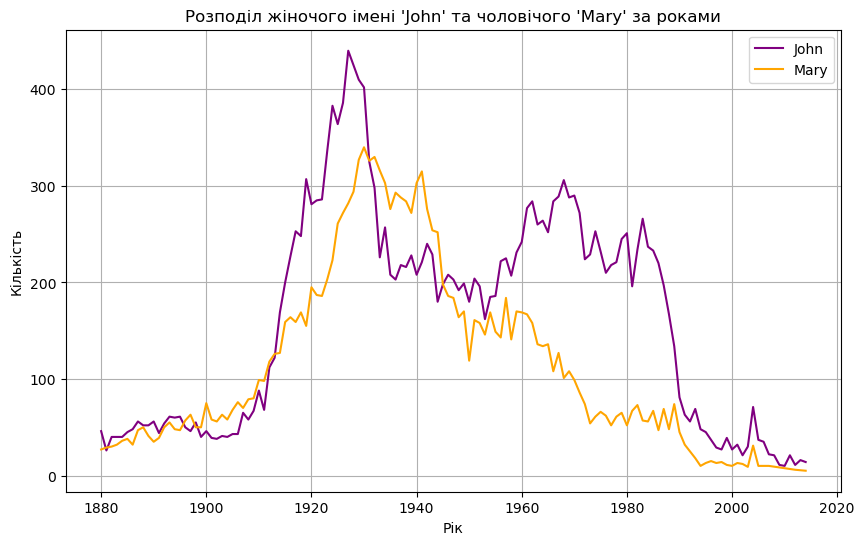

In [19]:
# Task 26+

import matplotlib.pyplot as plt

john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')].groupby('Year')['Count'].sum()
mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))

plt.plot(john_female.index, john_female.values, label="John", color='purple')
plt.plot(mary_male.index, mary_male.values, label="Mary", color='orange')

plt.title("Розподіл жіночого імені 'John' та чоловічого 'Mary' за роками")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.legend()
plt.grid()
plt.show()